# Fix pathing

In [1]:
import sys


sys.path.append("../..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))))


# Imports

In [3]:
import json
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np


# Constants

In [4]:
FOLDER_NAMES = ["exp_2_least_active", "exp_2_avg_active", "exp_2_most_active"]
LABELS = ["Least Active Day", "Average Active Day", "Most Active Day"]
COLORS = ["green", "blue", "red"]

FOLDER_PATH = os.path.join(os.path.dirname(constants.PROJECT_DIRECTORY_PATH), "Simulator", "data")


# Methods

In [5]:
def load_json():
    datasets = []
    for folder_name in FOLDER_NAMES:
        dataset = []
        for ts in range(1, 24):
            with open(os.path.join(FOLDER_PATH, folder_name, "heuristic_ts=" + str(ts) + ".json"), 'r') as file:
                dataset.append(json.load(file))
        datasets.append(dataset)

    return datasets


In [6]:
def plot_fitness_for_objects(datasets, degree=2):
    plt.figure(figsize=(12, 6))

    all_fitness = []

    # Plot scatter and fit polynomial for each dataset
    for dataset, label, color in zip(datasets, LABELS, COLORS):
        fitness = [data_object['fitness'][-1][0] for data_object in dataset]
        time_segments = list(range(len(fitness)))
        plt.scatter(time_segments, fitness, color=color, label=f"{label}")
        all_fitness.append(fitness)

        # Fit and plot a polynomial
        coeffs = np.polyfit(time_segments, fitness, degree)
        polynomial = np.poly1d(coeffs)
        plt.plot(time_segments, polynomial(time_segments), color=color)

    # Calculate and plot the average fitness per time segment
    fitness = [sum(f) / len(f) for f in zip(*all_fitness)]
    time_segments = list(range(len(fitness)))
    plt.scatter(time_segments, fitness, color="black", label='Average Fitness')

    coeffs = np.polyfit(time_segments, fitness, degree)
    polynomial = np.poly1d(coeffs)
    plt.plot(time_segments, polynomial(time_segments), "--", color="black")

    # Determine the best overall time segment
    best_time_segment = fitness.index(min(fitness))
    plt.axvline(x=best_time_segment, color='purple', linestyle=':', label=f'Best Number of Time Segments: {best_time_segment}')

    plt.xlabel('Number of Time Segments')
    plt.ylabel('Best Fitness')
    plt.ylim(bottom=0)
    title = 'Best Fitness Over Number of Time Segments'
    plt.title(title, fontdict=constants.FONT_PROPERTIES_HEADER)
    plt.grid(True)
    plt.legend(loc="lower right")

    plt.savefig(os.path.join(constants.PROJECT_DIRECTORY_PATH, "source", "analysis", "plots", title + ".png"), dpi=300, bbox_inches='tight')

    plt.show()


# Main

In [7]:
datasets = load_json()

for key, value in datasets[0][0].items():
    print(key)


avg_response_time_rural_a
avg_response_time_rural_h
avg_response_time_rural_v1
avg_response_time_urban_a
avg_response_time_urban_h
avg_response_time_urban_v1
diversity
fitness
percentage_violations
percentage_violations_rural
percentage_violations_urban


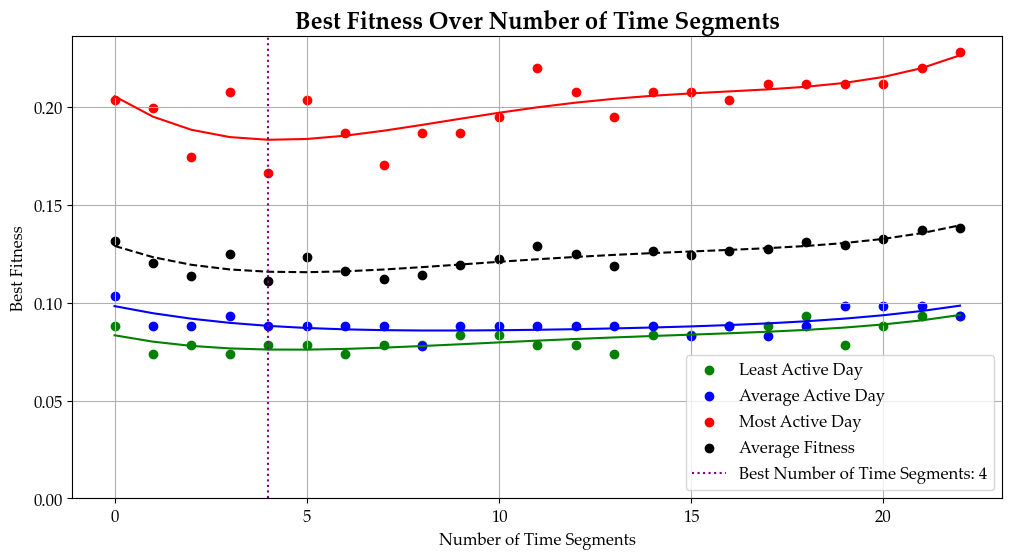

In [8]:
plot_fitness_for_objects(datasets, degree=4)
